In [52]:
import yfinance as yf
import datetime
import pandas as pd

start = "2015-01-01"
end = datetime.datetime.today()

nvidia = yf.download("NVDA", start=start, end=end)
sp500 = yf.download("^GSPC", start=start, end=end)
nasdaq = yf.download("^IXIC", start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [53]:
nvidia.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2015-01-02,0.483012,0.486611,0.475333,0.483012,113680000
2015-01-05,0.474853,0.484451,0.472694,0.483011,197952000
2015-01-06,0.460457,0.476053,0.459977,0.475573,197764000
2015-01-07,0.459257,0.467895,0.457817,0.463816,321808000
2015-01-08,0.476533,0.479412,0.464296,0.464536,283780000


In [54]:
nvidia.index = pd.to_datetime(nvidia.index)
sp500.index = pd.to_datetime(sp500.index)
nasdaq.index = pd.to_datetime(nasdaq.index)


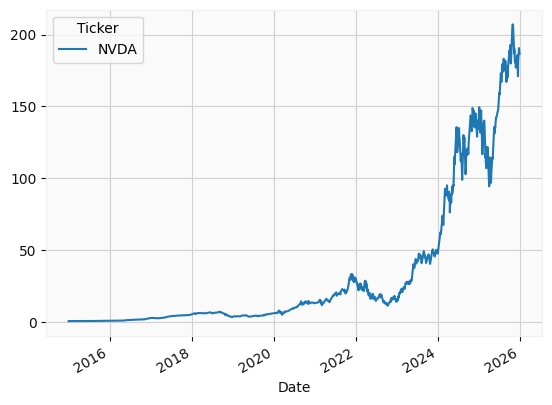

In [55]:
import matplotlib.pyplot as plt
nvidia['Close'].plot()
plt.show()

CLOSE PLOT


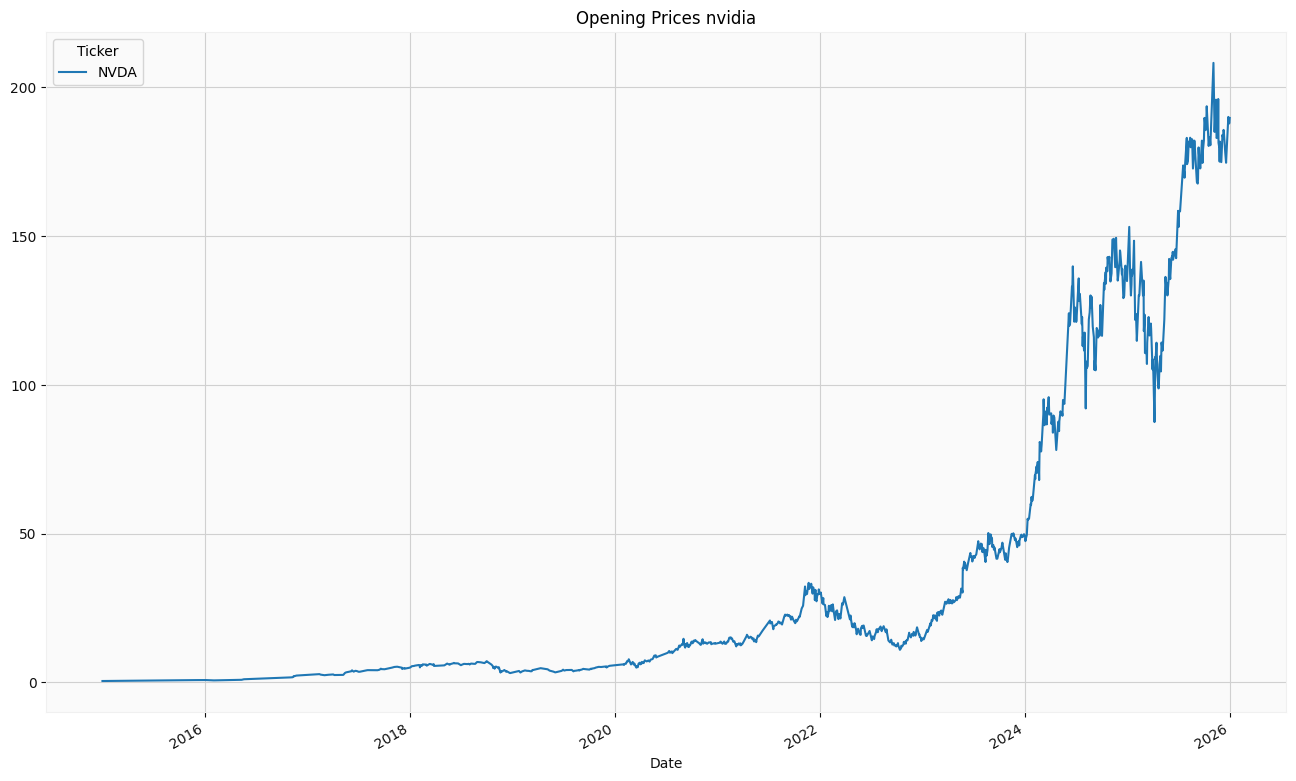

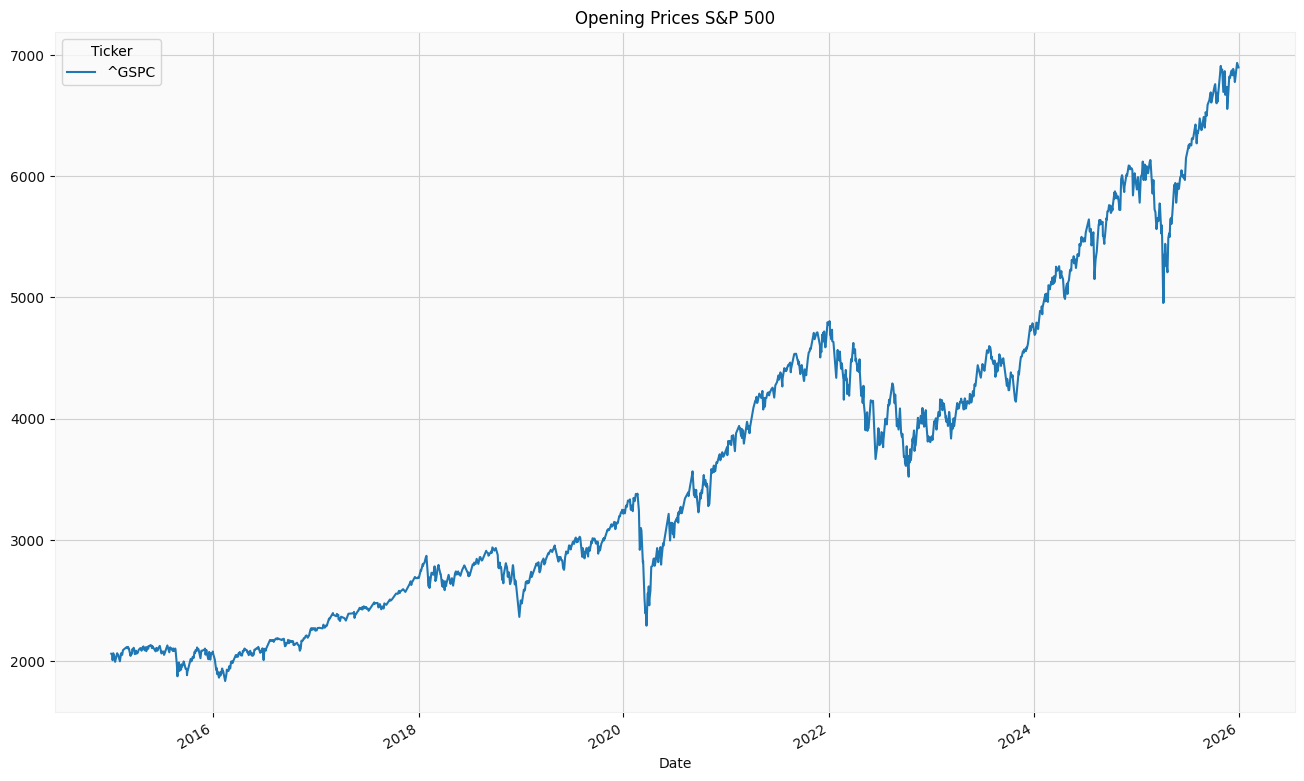

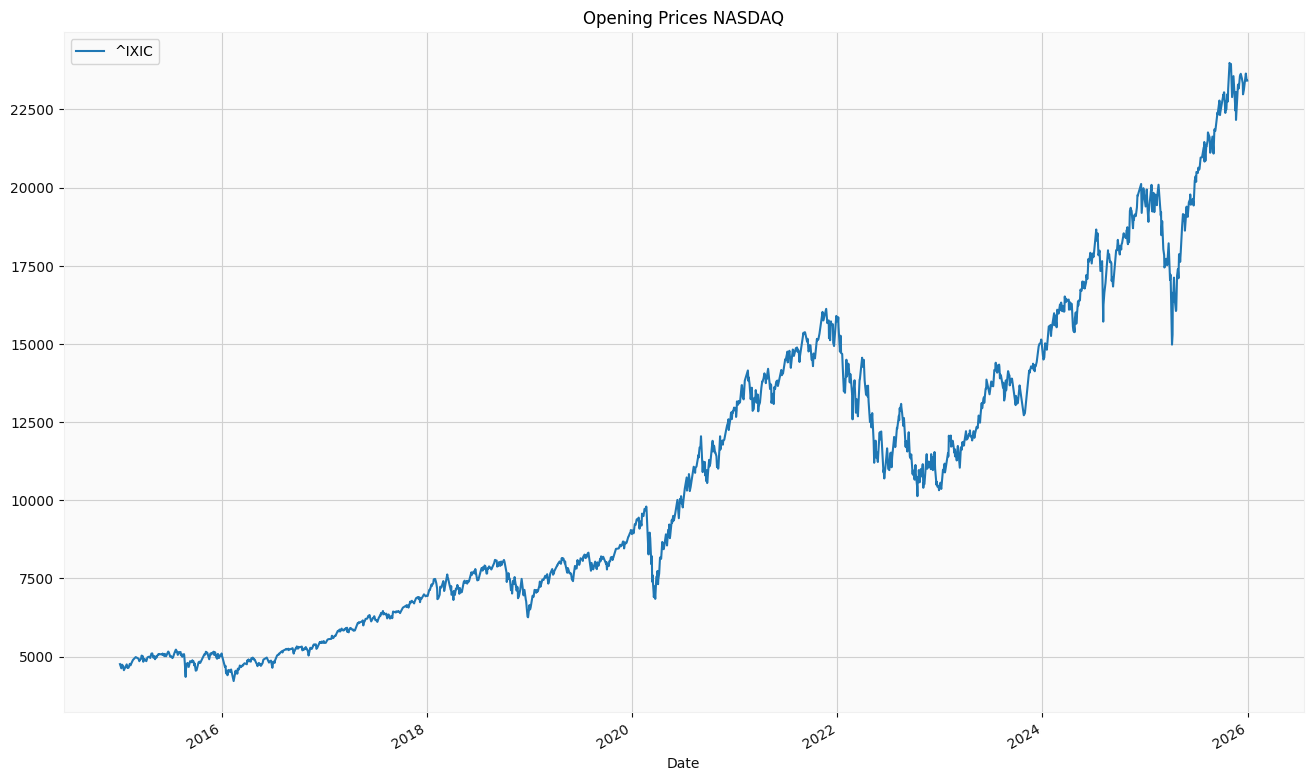

In [56]:

nvidia['Open'].plot(label = 'nvidia', figsize = (16,10), title = 'Opening Prices nvidia')
sp500['Open'].plot(label = 'sp500',figsize = (16,10), title = 'Opening Prices S&P 500')
nasdaq['Open'].plot(label = 'nasdaq',figsize = (16,10), title = 'Opening Prices NASDAQ')
plt.legend(loc = 'best')

VOLUME PLOT

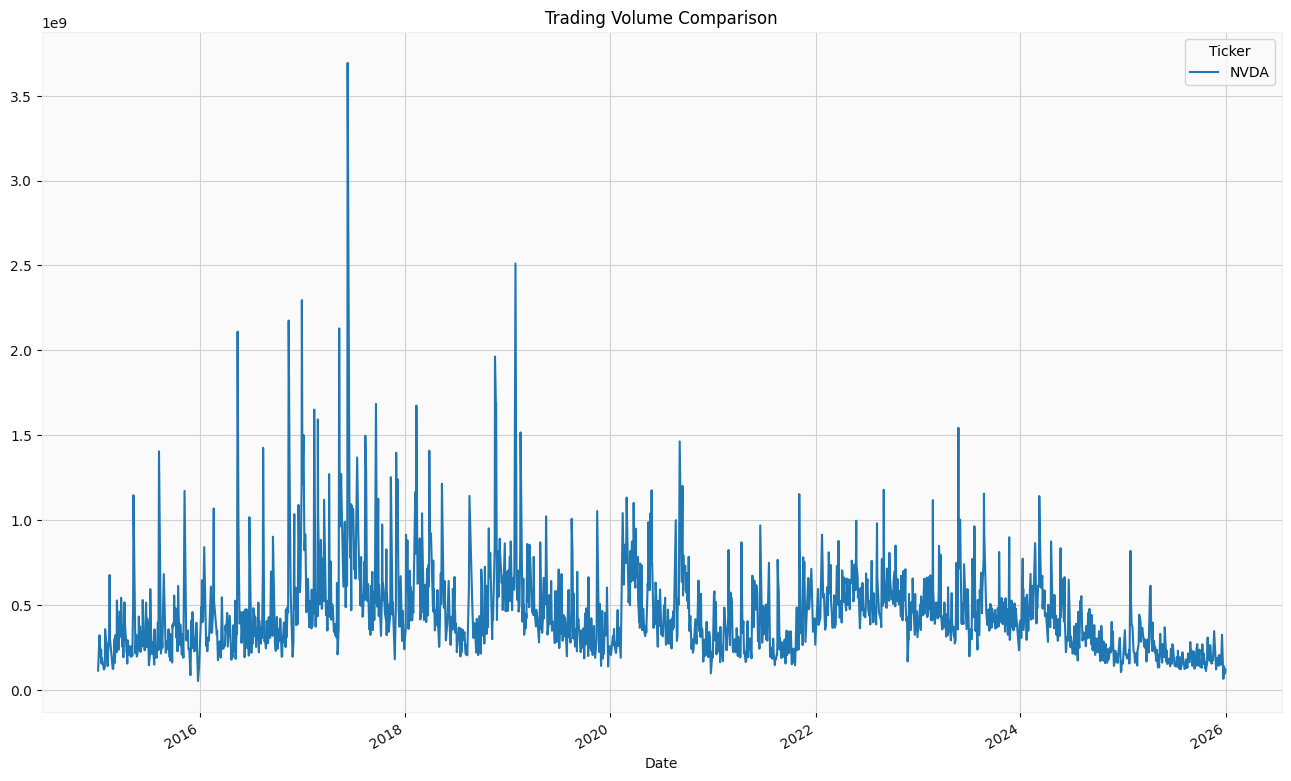

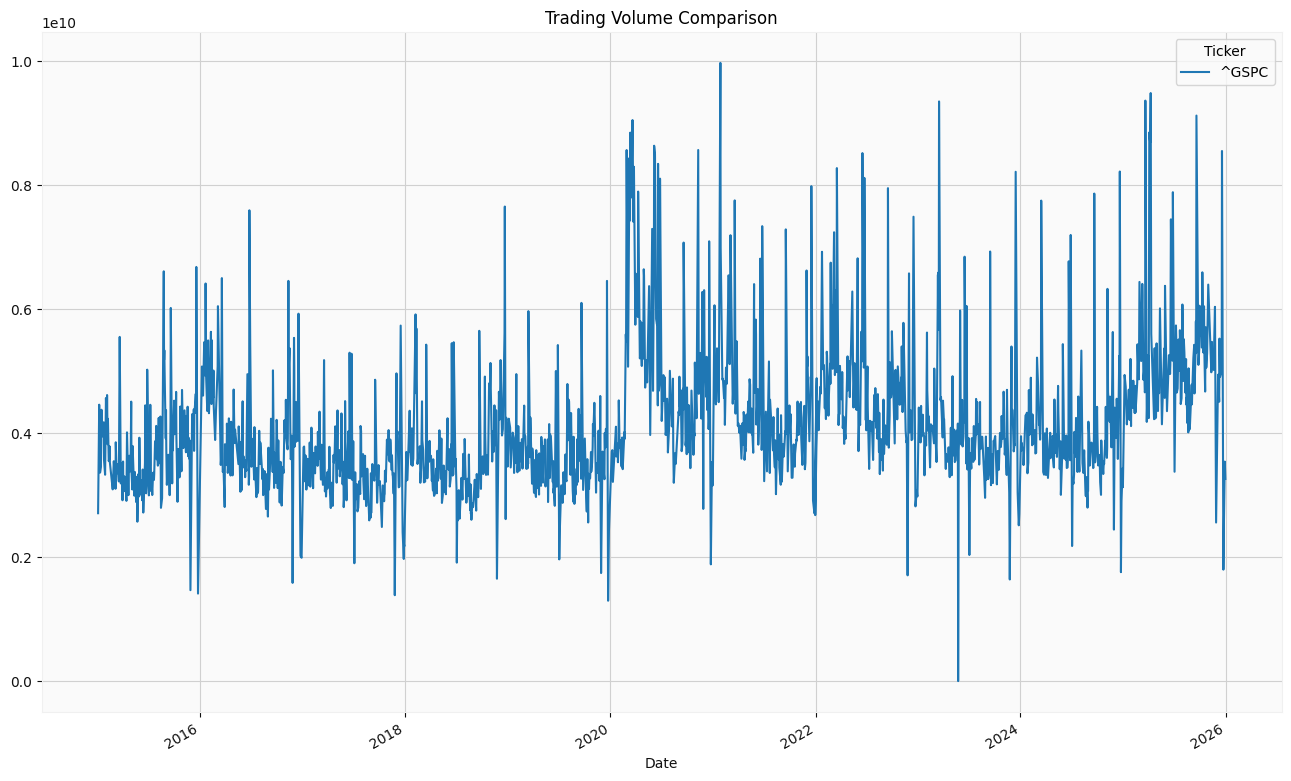

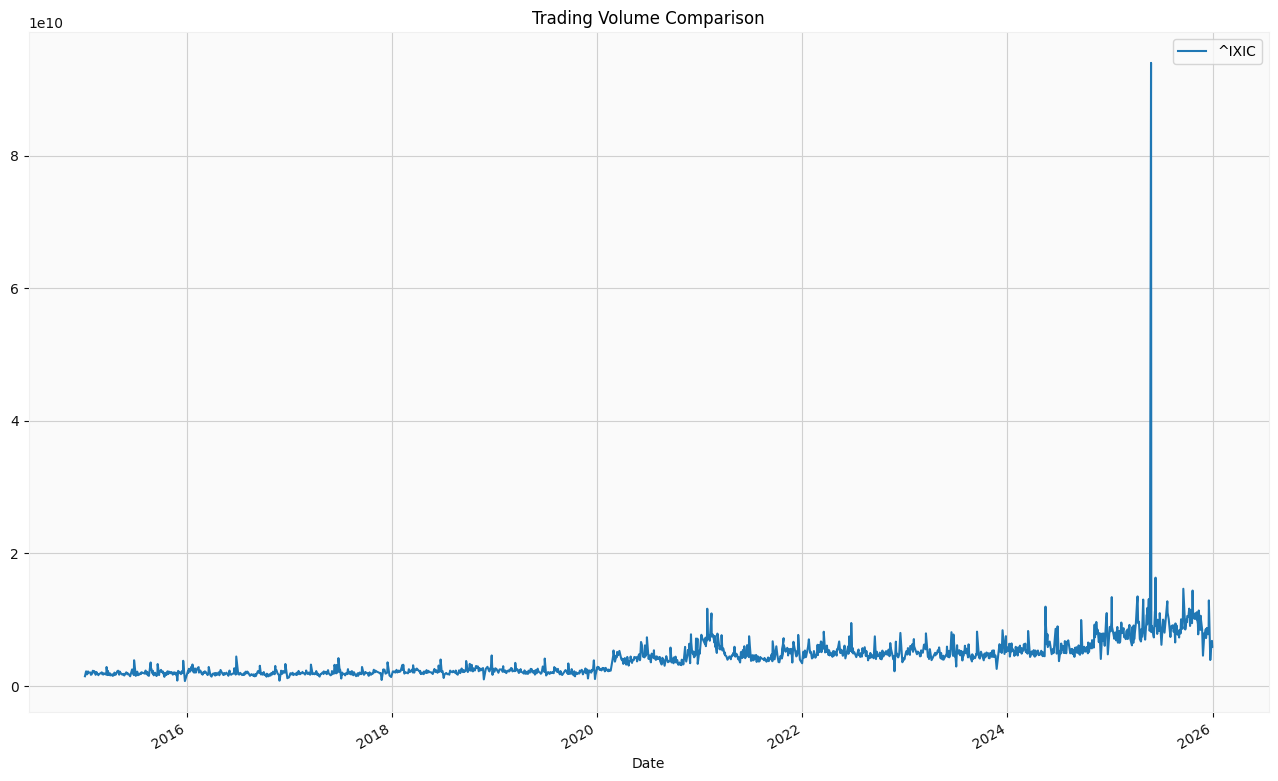

In [57]:
nvidia['Volume'].plot(label='nvidia', figsize=(16,10),title='Trading Volume Comparison')
sp500['Volume'].plot(label='S&P 500', figsize=(16,10),title='Trading Volume Comparison')
nasdaq['Volume'].plot(label='Nasdaq', figsize=(16,10),title='Trading Volume Comparison')

plt.legend()
plt.show()

NORMALIZED VOL PLOT

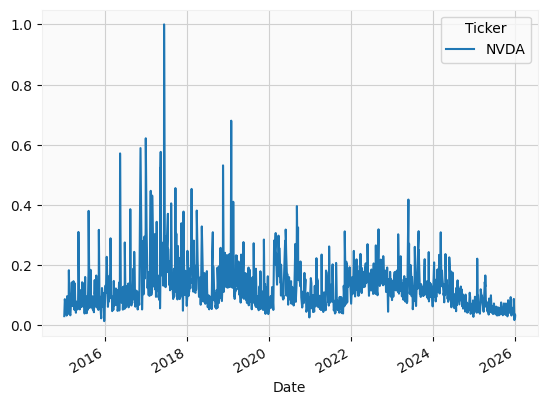

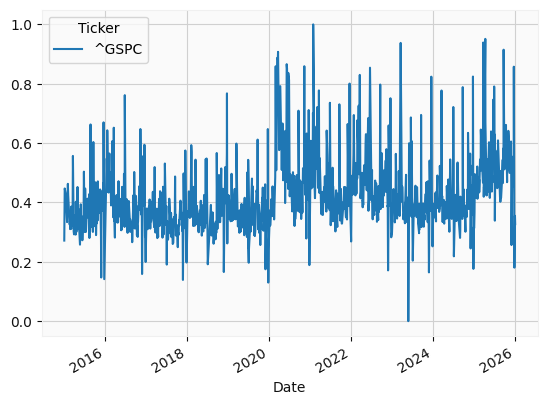

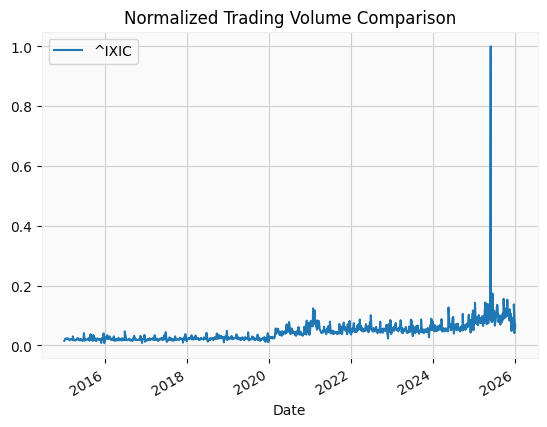

In [58]:
(nvidia['Volume'] / nvidia['Volume'].max()).plot(label='nvidia')
(sp500['Volume'] / sp500['Volume'].max()).plot(label='S&P 500')
(nasdaq['Volume'] / nasdaq['Volume'].max()).plot(label='Nasdaq')

plt.title("Normalized Trading Volume Comparison")
plt.legend()
plt.show()


Total Traded

In [60]:
nvidia['Total Traded'] = nvidia['Open'] * nvidia['Volume']
sp500['Total Traded'] = sp500['Open'] * sp500['Volume']
nasdaq['Total Traded'] = nasdaq['Open'] * nasdaq['Volume']



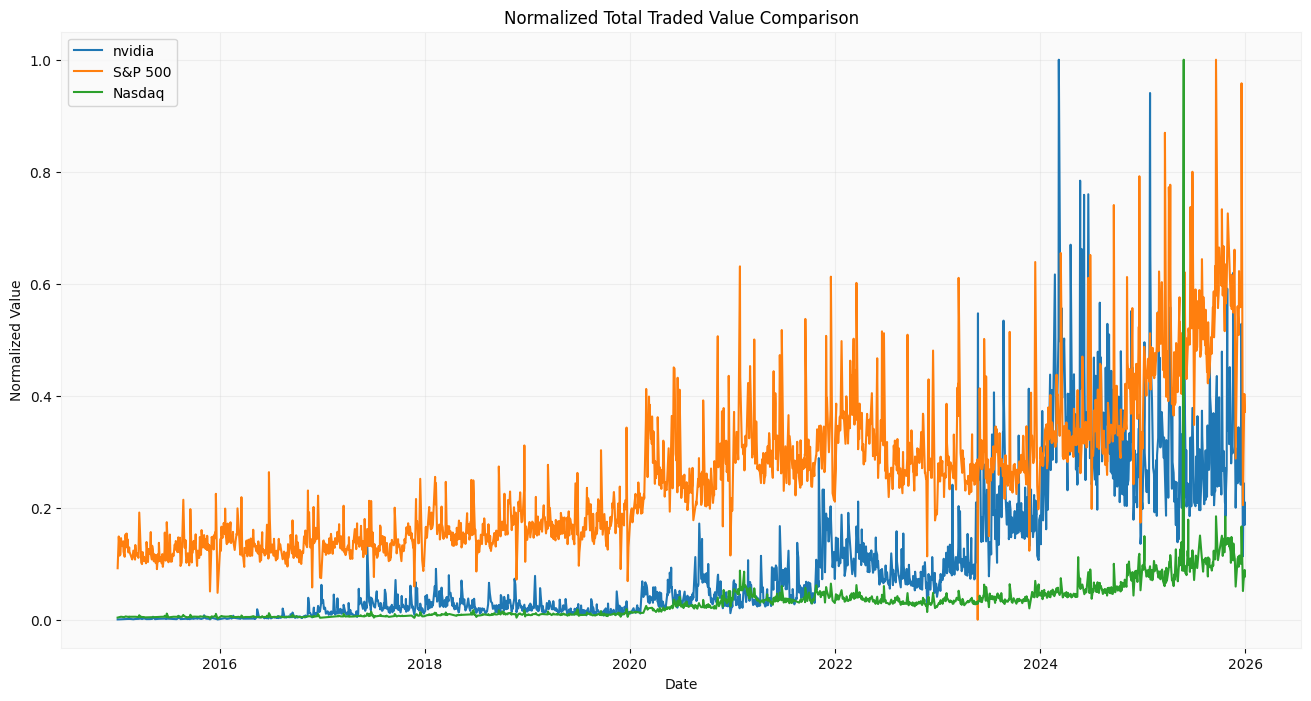

In [61]:
plt.figure(figsize=(16,8))

plt.plot(nvidia['Total Traded'] / nvidia['Total Traded'].max(), label='nvidia')
plt.plot(sp500['Total Traded'] / sp500['Total Traded'].max(), label='S&P 500')
plt.plot(nasdaq['Total Traded'] / nasdaq['Total Traded'].max(), label='Nasdaq')

plt.title('Normalized Total Traded Value Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


TOTAL TRADED OF AVG

In [62]:
nvidia.columns = nvidia.columns.get_level_values(0)
sp500.columns = sp500.columns.get_level_values(0)
nasdaq.columns = nasdaq.columns.get_level_values(0)

# Calculate average price
nvidia['Avg'] = nvidia[['High', 'Low']].mean(axis=1)
sp500['Avg'] = sp500[['High', 'Low']].mean(axis=1)
nasdaq['Avg'] = nasdaq[['High', 'Low']].mean(axis=1)

# Calculate Total Traded Value
nvidia['Total Traded New'] = nvidia['Avg'] * nvidia['Volume']
sp500['Total Traded New'] = sp500['Avg'] * sp500['Volume']
nasdaq['Total Traded New'] = nasdaq['Avg'] * nasdaq['Volume']

# Normalize for fair comparison
nvidia_norm = nvidia['Total Traded New'] / nvidia['Total Traded New'].max()
sp500_norm = sp500['Total Traded New'] / sp500['Total Traded New'].max()
nasdaq_norm = nasdaq['Total Traded New'] / nasdaq['Total Traded New'].max()




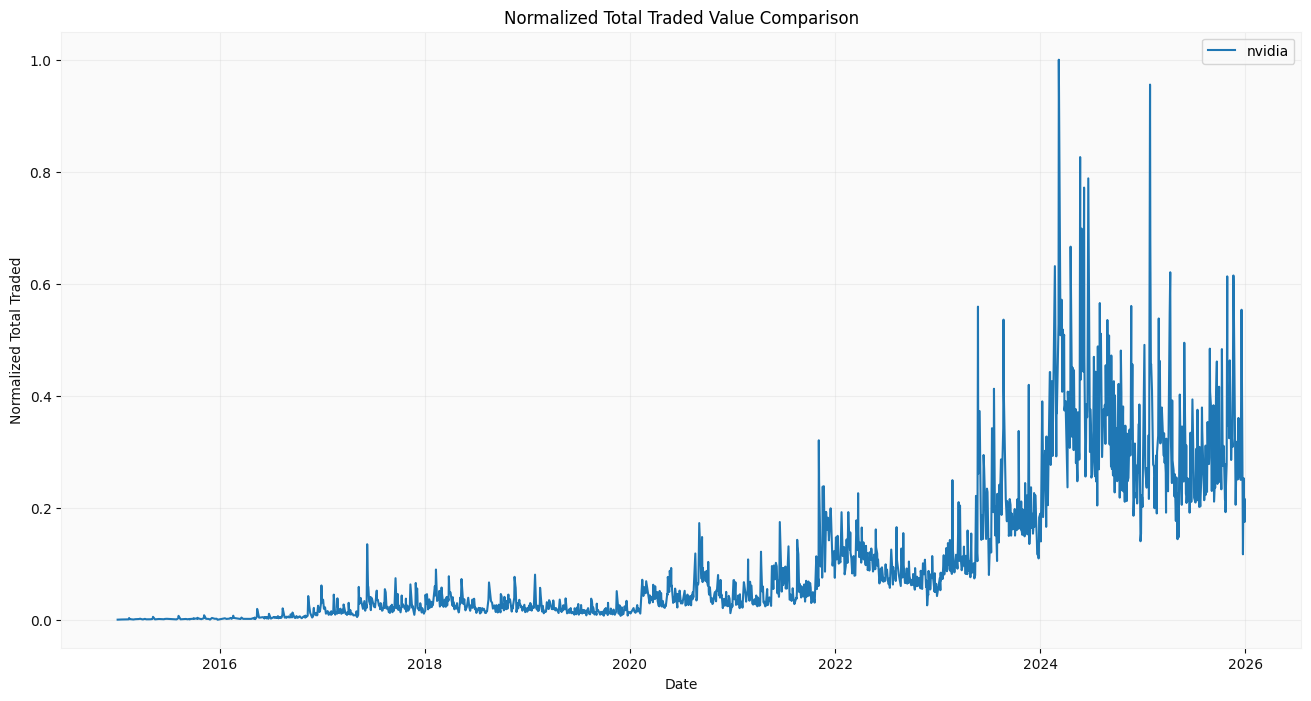

In [ ]:
# Plot
plt.figure(figsize=(16,8))
plt.plot(nvidia_norm, label='nvidia')
plt.title('Normalized Total Traded Value NVIDIA')
plt.xlabel('Date')
plt.ylabel('Normalized Total Traded')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

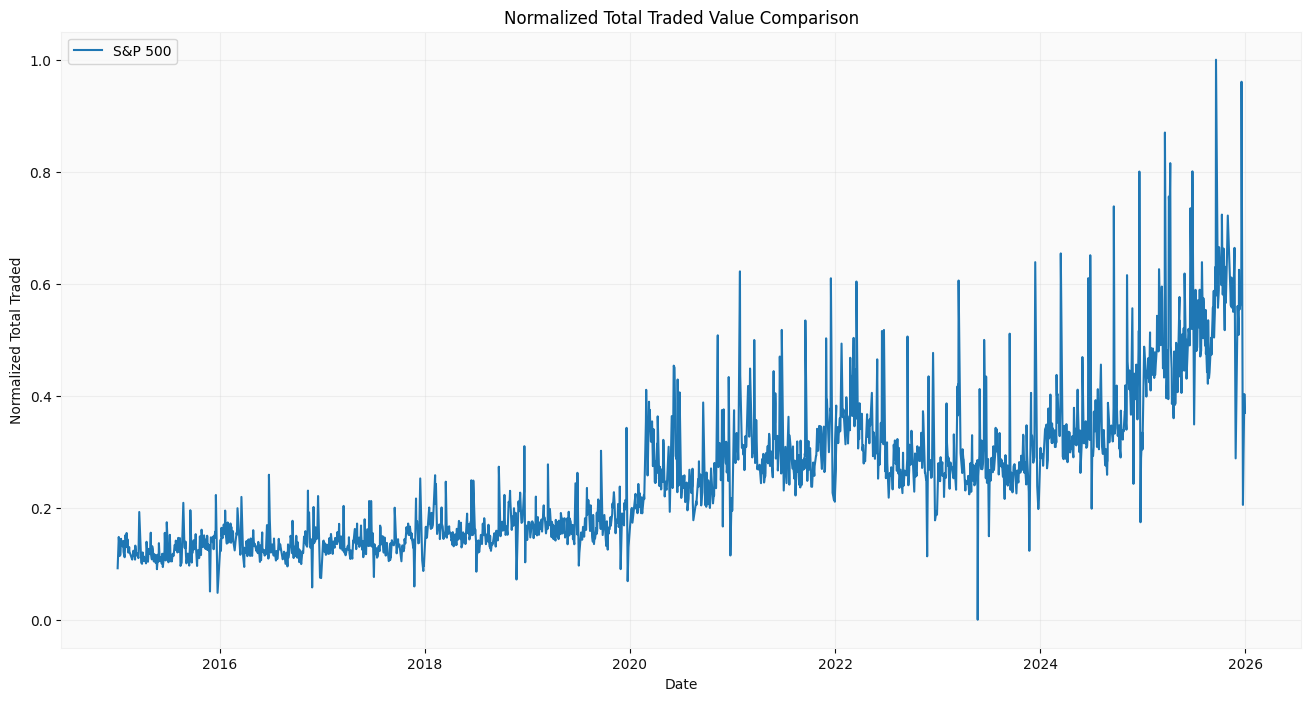

In [ ]:

plt.figure(figsize=(16,8))
plt.plot(sp500_norm, label='S&P 500')
plt.title('Normalized Total Traded Value S&P 500')
plt.xlabel('Date')
plt.ylabel('Normalized Total Traded')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

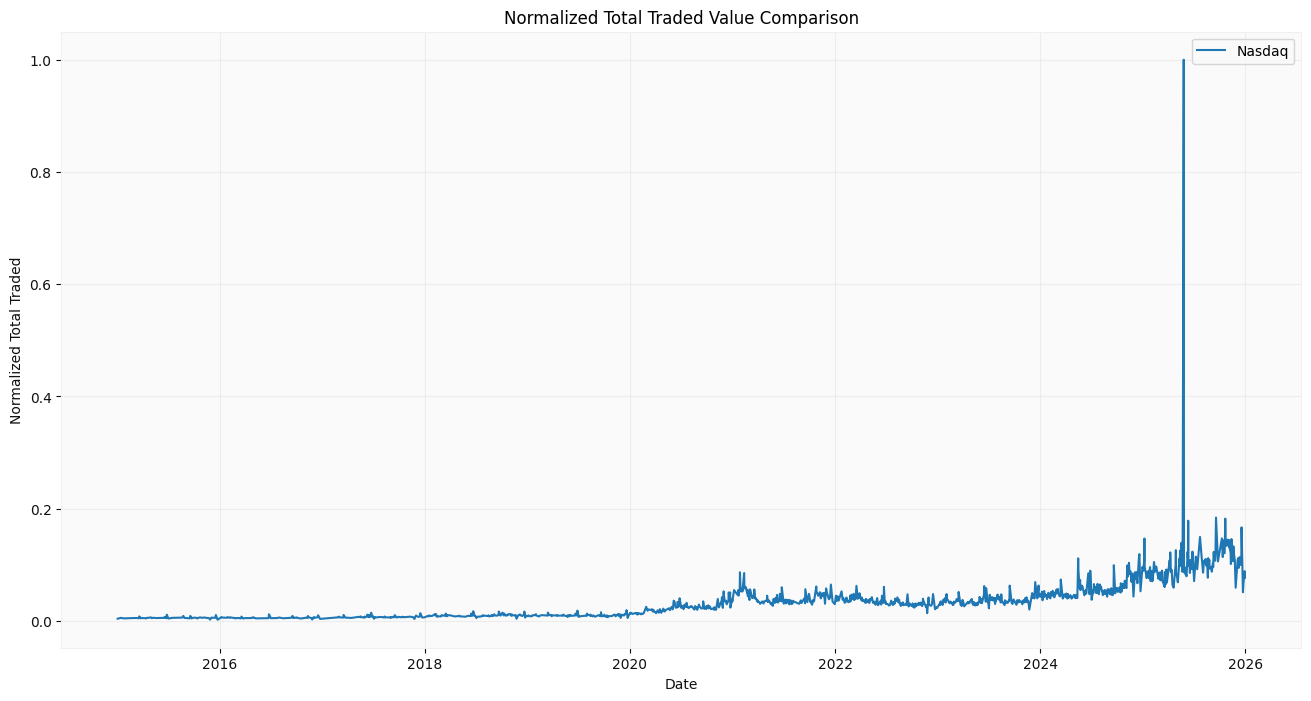

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(nasdaq_norm, label='Nasdaq')
plt.title('Normalized Total Traded Value Nasdaq')
plt.xlabel('Date')
plt.ylabel('Normalized Total Traded')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


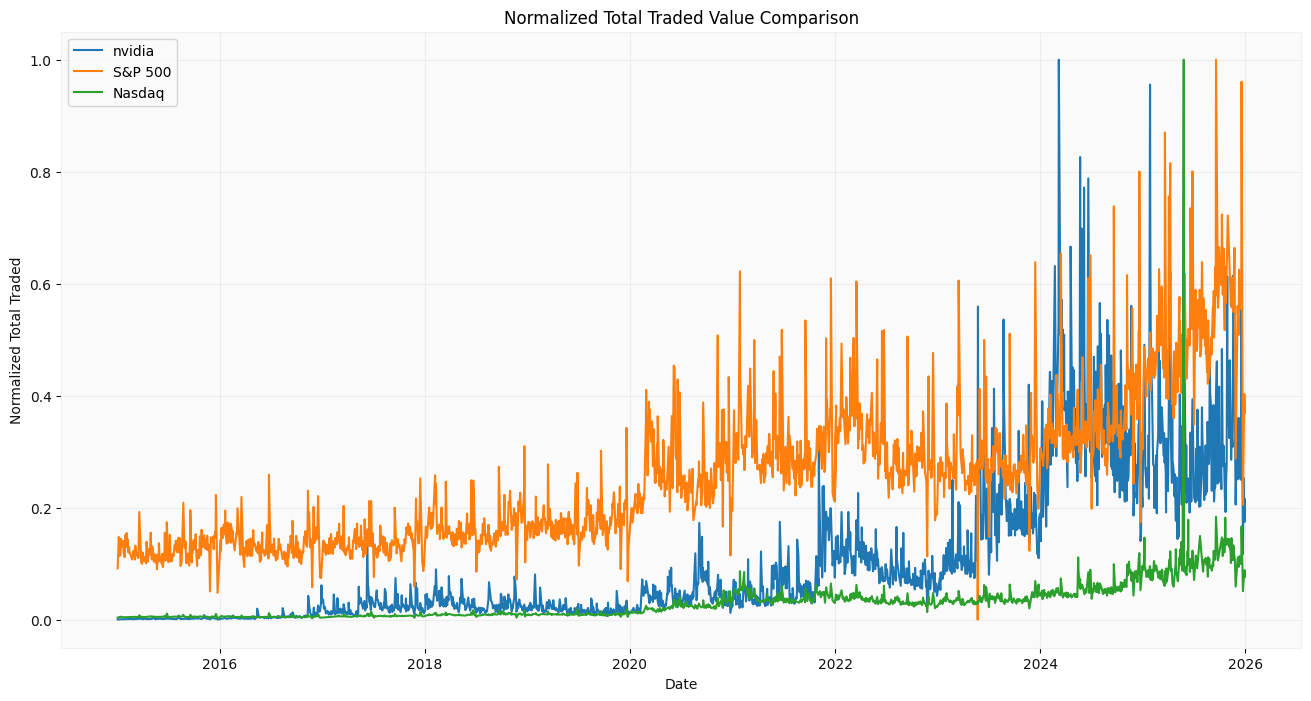

In [66]:
plt.figure(figsize=(16,8))
plt.plot(nvidia_norm, label='nvidia')
plt.plot(sp500_norm, label='S&P 500')
plt.plot(nasdaq_norm, label='Nasdaq')
plt.title('Normalized Total Traded Value Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Total Traded')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

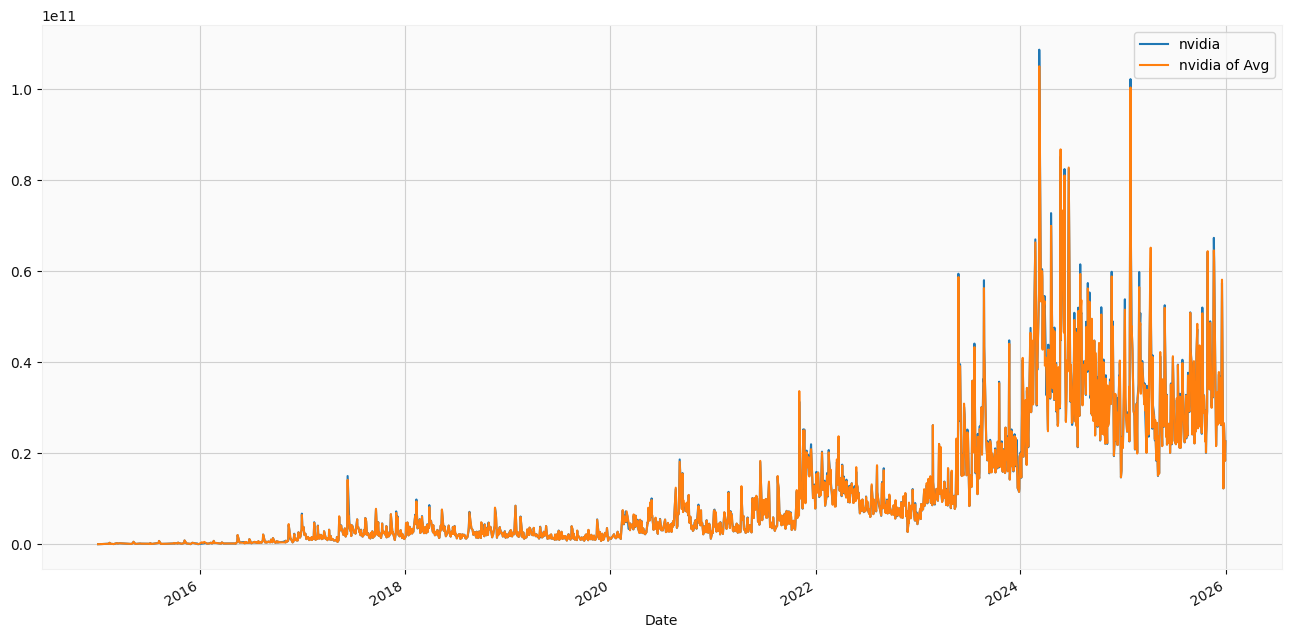

In [67]:
#Now we can compare Total Traded vs Total Traded New.
nvidia['Total Traded'].plot(figsize = (16,8), label = 'nvidia')
nvidia['Total Traded New'].plot(figsize = (16,8), label = 'nvidia of Avg')
plt.legend(loc = 'best')

MOVING AVERAGE

<Axes: xlabel='Date'>

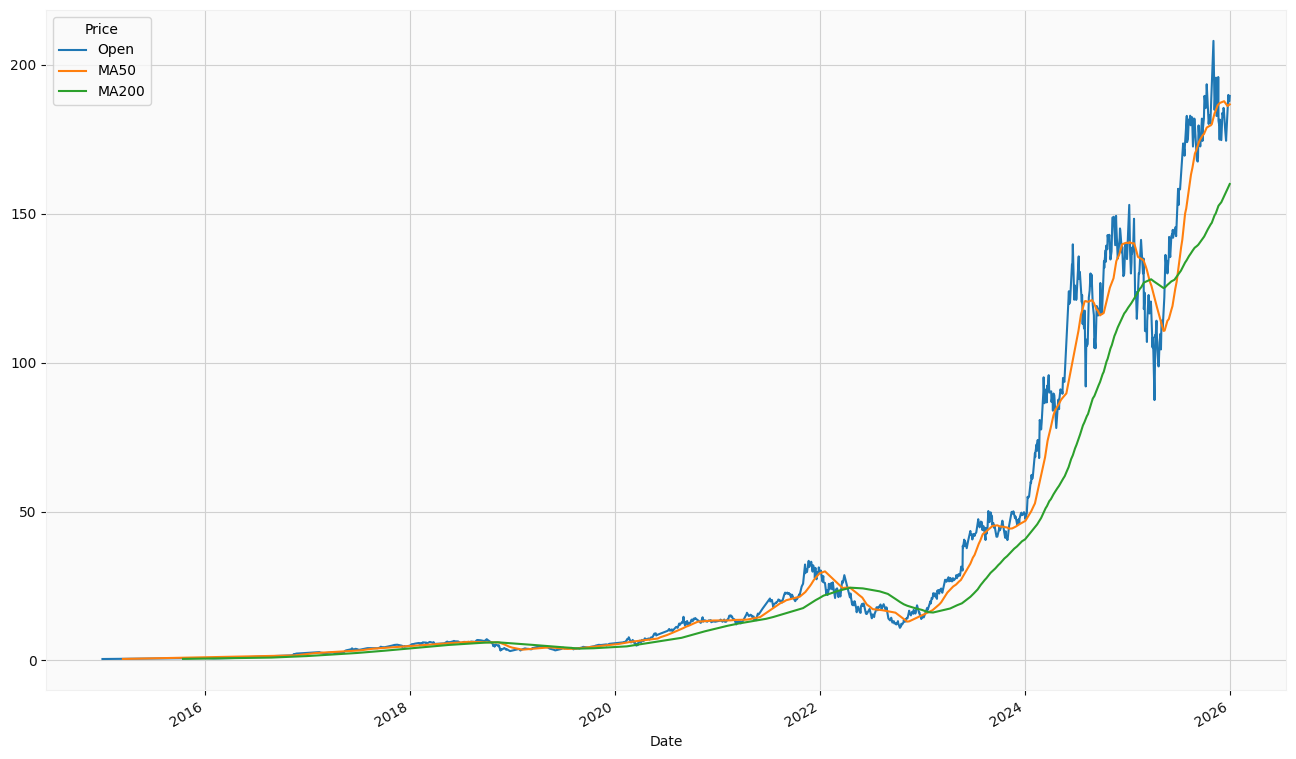

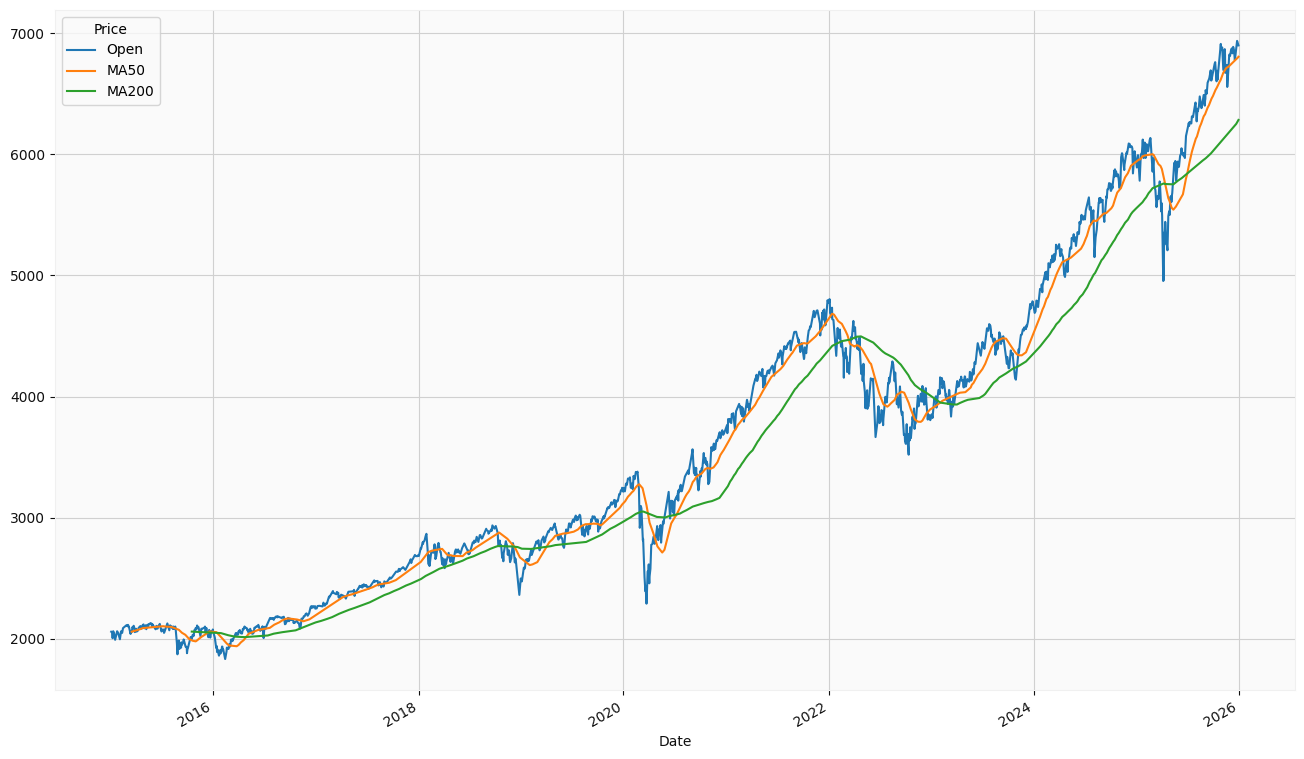

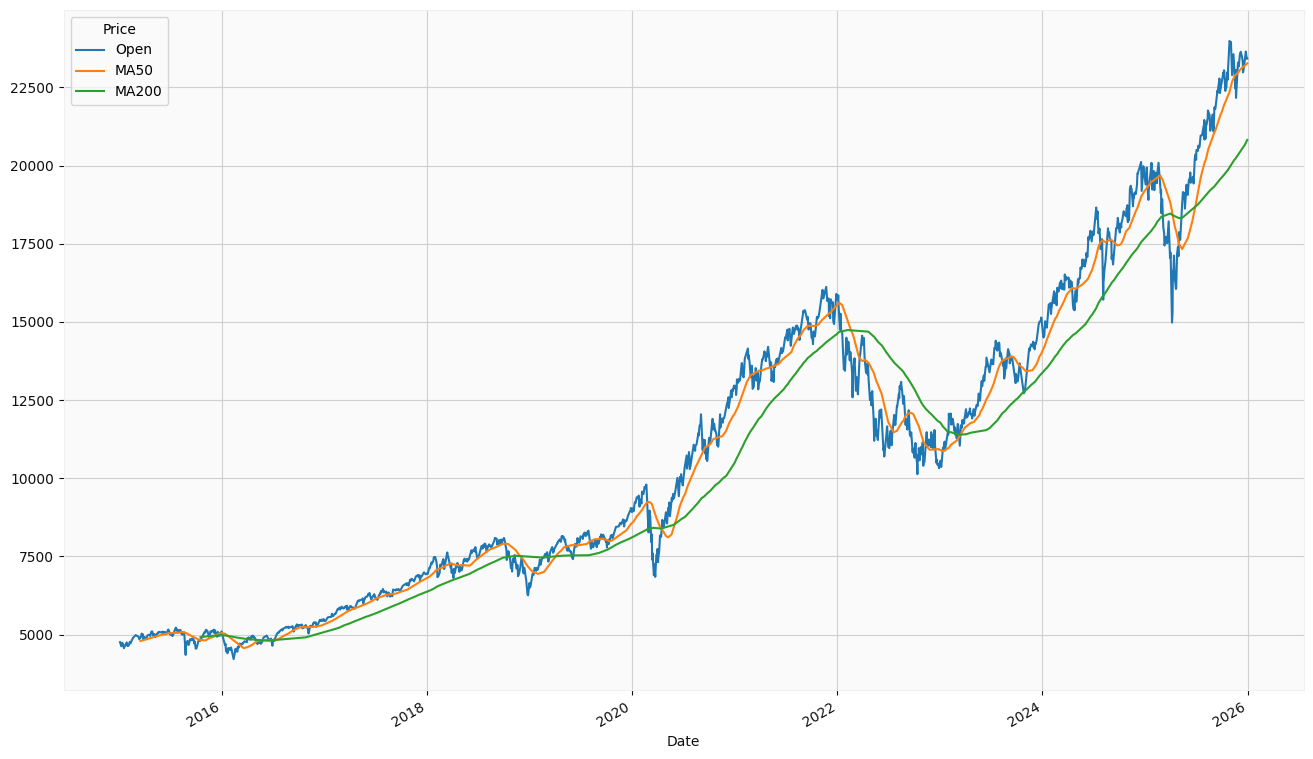

In [68]:
#Moving Average
#Moving Average (MA) is widely used in technical analysis to smooth out the 
# price by taking out the "noise" from random short-term price changes. 
# Since it is based on historical prices, it is a lagging or trend-following 
# indicator.

nvidia['MA50'] = nvidia['Open'].rolling(50).mean()
nvidia['MA200'] = nvidia['Open'].rolling(200).mean()
nvidia[['Open','MA50','MA200']].plot(figsize = (16,10))

sp500['MA50'] = sp500['Open'].rolling(50).mean()
sp500['MA200'] = sp500['Open'].rolling(200).mean()
sp500[['Open','MA50','MA200']].plot(figsize = (16,10))

nasdaq['MA50'] = nasdaq['Open'].rolling(50).mean()
nasdaq['MA200'] = nasdaq['Open'].rolling(200).mean()
nasdaq[['Open','MA50','MA200']].plot(figsize = (16,10))

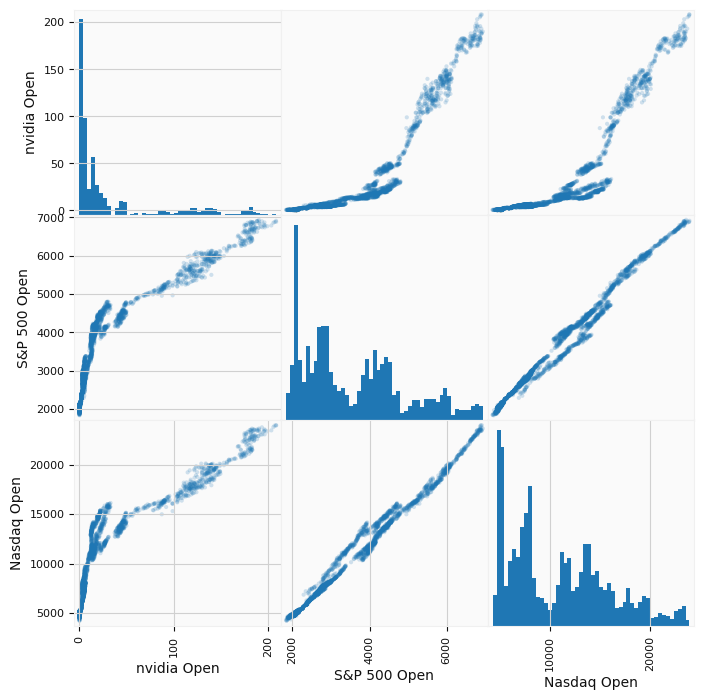

In [69]:
#Basic Analysis
from pandas.plotting import scatter_matrix
import pandas as pd

ret_comp = pd.concat([nvidia['Open'],sp500['Open'],nasdaq['Open']], axis = 1)
ret_comp.columns = ['nvidia Open', 'S&P 500 Open', 'Nasdaq Open']
scatter_matrix(ret_comp, figsize =(8,8), alpha = 0.2, hist_kwds={'bins':50});

CANDEL STICK CHART

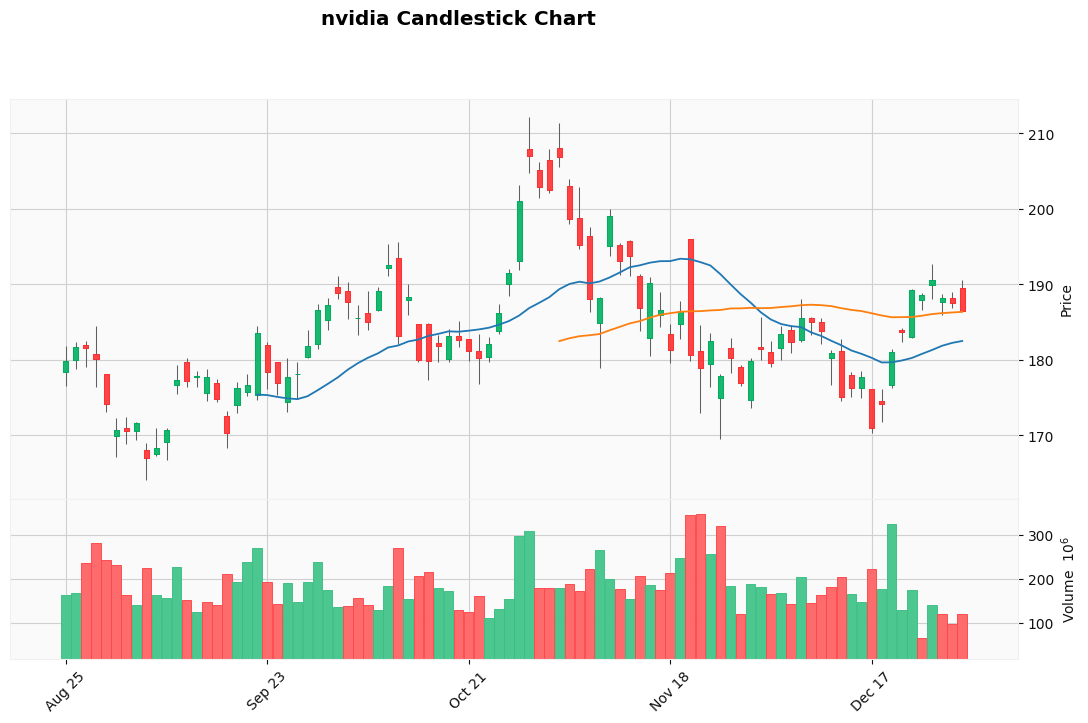

In [70]:
import mplfinance as mpf

# Make sure index is datetime
nvidia.index = pd.to_datetime(nvidia.index)
recent=nvidia.tail(90)

# Plot candlestick chart
mpf.plot(
    recent,
    type='candle',
    style='yahoo',
    title='nvidia Candlestick Chart',
    volume=True,
    mav=(20, 50),
    figsize=(14,8)
)


In [71]:
#return 
nvidia['Return'] = nvidia['Close'].pct_change()
sp500['Return'] = sp500['Close'].pct_change()
nasdaq['Return'] = nasdaq['Close'].pct_change()


In [72]:

#CUMULATIVE RETURNS (Growth Over Time)=If I invested ₹1 on day one, how much would it be worth now?
nvidia['Cumulative_Return'] = (1 + nvidia['Return']).cumprod()
sp500['Cumulative_Return'] = (1 + sp500['Return']).cumprod()
nasdaq['Cumulative_Return'] = (1 + nasdaq['Return']).cumprod()


In [73]:
#VOLATILITY (RISK) : Higher value = more risky
nvidia_vol = nvidia['Return'].std()
sp500_vol = sp500['Return'].std()
nasdaq_vol = nasdaq['Return'].std()


In [74]:
#ROLLING VOLATILITY (30-day)
nvidia['Rolling_Vol'] = nvidia['Return'].rolling(30).std()
sp500['Rolling_Vol'] = sp500['Return'].rolling(30).std()
nasdaq['Rolling_Vol'] = nasdaq['Return'].rolling(30).std()


In [75]:
#MAX DRAWDOWN
nvidia['Drawdown'] = (nvidia['Close'] - nvidia['Close'].cummax()) / nvidia['Close'].cummax()
sp500['Drawdown'] = (sp500['Close'] - sp500['Close'].cummax()) / sp500['Close'].cummax()
nasdaq['Drawdown'] = (nasdaq['Close'] - nasdaq['Close'].cummax()) / nasdaq['Close'].cummax()


In [ ]:
#CORRELATION
returns_df = pd.concat([
    nvidia['Return'],
    sp500['Return'],
    nasdaq['Return']
], axis=1)

returns_df.columns = ['nvidia', 'S&P 500', 'Nasdaq']

returns_df.corr()


,nvidia,S&P 500,Nasdaq
nvidia,1.000000,0.646356,0.735891
S&P 500,0.646356,1.000000,0.949392
Nasdaq,0.735891,0.949392,1.000000


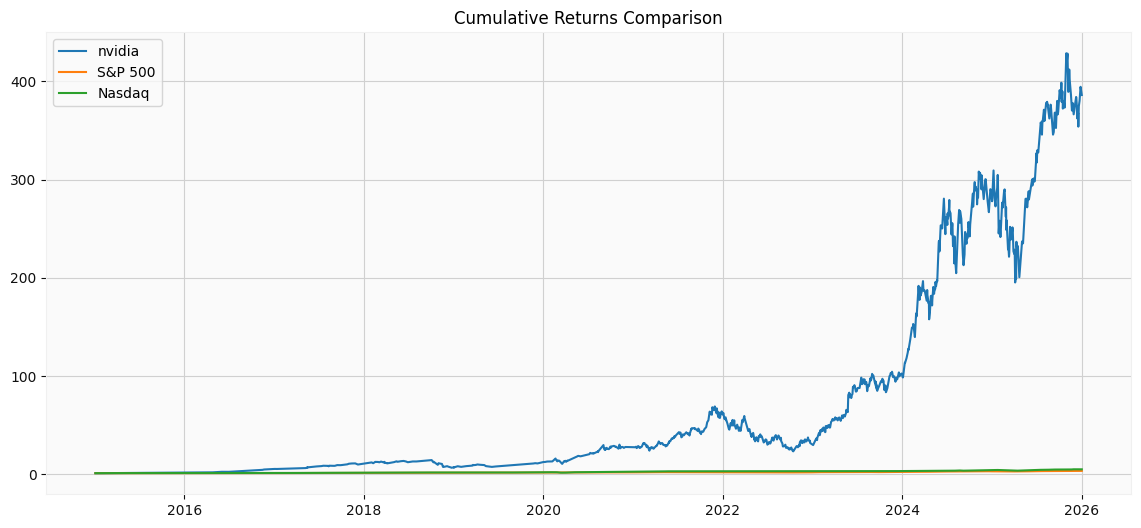

In [77]:
# Cumulative returns
plt.figure(figsize=(14,6))
plt.plot(nvidia['Cumulative_Return'], label='nvidia')
plt.plot(sp500['Cumulative_Return'], label='S&P 500')
plt.plot(nasdaq['Cumulative_Return'], label='Nasdaq')
plt.legend()
plt.title('Cumulative Returns Comparison')
plt.show()


In [82]:

final_df = pd.concat([
    nvidia.assign(Asset="NVIDIA"),
    sp500.assign(Asset="S&P 500"),
    nasdaq.assign(Asset="NASDAQ")
])
final_df.dropna(inplace=True)
final_df



Price,Close,High,Low,Open,Volume,Total Traded,Avg,Total Traded New,MA50,MA200,Return,Cumulative_Return,Rolling_Vol,Drawdown,Asset
Date,,,,,,,,,,,,,,,
2015-10-16,0.677006,0.683325,0.667043,0.668744,448396000,2.998623e+08,0.675184,3.027498e+08,0.570075,0.525858,0.015676,1.401636,0.017198,0.000000,NVIDIA
2015-10-19,0.675792,0.682353,0.668016,0.679194,294712000,2.001665e+08,0.675184,1.989849e+08,0.572788,0.526839,-0.001794,1.399121,0.016285,-0.001794,NVIDIA
2015-10-20,0.674819,0.677979,0.667772,0.672875,264824000,1.781936e+08,0.672875,1.781936e+08,0.575202,0.527788,-0.001439,1.397108,0.015015,-0.003230,NVIDIA
2015-10-21,0.666071,0.683082,0.664856,0.678951,386280000,2.622650e+08,0.673969,2.603407e+08,0.577441,0.528805,-0.012964,1.378997,0.014640,-0.016152,NVIDIA
2015-10-22,0.690129,0.692316,0.672876,0.673848,306884000,2.067930e+08,0.682596,2.094777e+08,0.579651,0.529855,0.036118,1.428804,0.015502,0.000000,NVIDIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-24,23613.310547,23621.720703,23527.970703,23555.949219,3885190000,9.151934e+13,23574.845703,9.159275e+13,23206.958203,20703.127114,0.002184,4.995612,0.010781,-0.014407,NASDAQ
2025-12-26,23593.099609,23665.150391,23567.859375,23645.910156,5170300000,1.222564e+14,23616.504883,1.221044e+14,23225.106406,20732.799614,-0.000856,4.991337,0.010770,-0.015250,NASDAQ
2025-12-29,23474.349609,23531.019531,23397.519531,23414.679688,6527530000,1.528400e+14,23464.269531,1.531637e+14,23238.111992,20761.880210,-0.005033,4.966214,0.009900,-0.020207,NASDAQ


In [83]:

final_df.to_csv("market_analysis.csv")